# **ANUPAMA GEORGE**

TASK #1  UNDER DATA SCIENCE AND BUSINESS ANALYTICS DOMAIN

(Prediction using Supervised ML)

**GRIP - THE SPARKS FOUNDATION** 

**OBJECTIVE:** 

1) To find out if there is a significant relationship between number of hours spent in studying and the scores.

2) To predict score given number of hours.

In [1]:
#Importing relevant libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading the dataset 

df = pd.read_csv('/content/student_scores - student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Understanding the data - Exploratory Data Analysis

In [3]:
#shape of the dataset
print(f'The number of rows in the dataset is {df.shape[0]} and columns is {df.shape[1]}.')

The number of rows in the dataset is 25 and columns is 2.


Based on our objective, the independent variable is the number of hours and the dependent variable is the score. Let us explore their relationship and carry out assumption checks before we move on to model building.

In [4]:
#Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


If we compare the mean and median of both variables, in both cases we see that median(2nd quantile) is lesser than the mean indicating a slight right skew.

In [5]:
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64


Since both skewness values are greater than zero but lie within the acceptable range of -0.5 to +0.5, we can say that the data is normal.

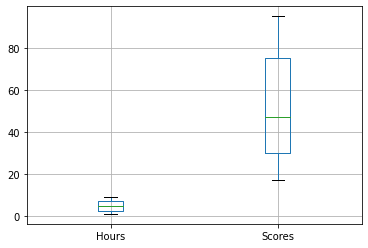

In [6]:
#Detecting outliers in the dataset
df.boxplot()

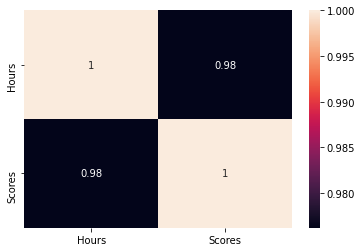

In [7]:
#Checking relationship between the variables using visualizations

sns.heatmap(df.corr(),annot=True)

We can see very high positive correlation between hours and scores (r = +0.98)

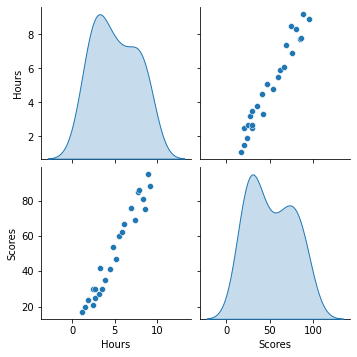

In [8]:
sns.pairplot(df, diag_kind='kde')

From the above graph we can see a strong positive linear relationship between the two variables, however, the kde plot of each variable shows bimodality. We need to check for the assumptions of Linear Regression before building the model.

From the boxplots we can see that there are no outliers in the dataset.

#Creating Base Model

In [9]:
# Raw OLS Model
X=df['Hours']
y=df['Scores']
import statsmodels.formula.api as smf

lin_reg=smf.ols('Scores ~ Hours ', data=df).fit()

#X_constant = sm.add_constant(X)  #does not automatically learn intercept
#lin_reg = sm.OLS(y,X_constant).fit()

lin_reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           9.13e-17
Time:                        13:37:36   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see from the summary that Hours has a significant impact on scores as pvalue<0.05.

# Linear Regression Assumptions

Checking for Linearity


In [11]:
#Rainbow Test For Linearity
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5) # any fraction of the data randomly taken should be linear to assume linearity for the entire dataset

(2.122962100893772, 0.11910586650135217)

The null hypothesis is the fit of the model using full sample is the same as using a central subset. The null hypothesis is rejected whenever the overall fit is significantly worse than the fit for the subsample. Since the pvalue is greater than 0.05 we may accept the null hypothesis of linearity.

In [34]:
#Shapiro-Wilk test for Normality
#Since the sample size is very small we are using this test instead of Jarque Bera.
import scipy
scipy.stats.shapiro(resids)

(0.904010534286499, 0.02245512418448925)

Since pvalue is lesser than 0.05, we may fail to accept the null hypothesis of normality.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


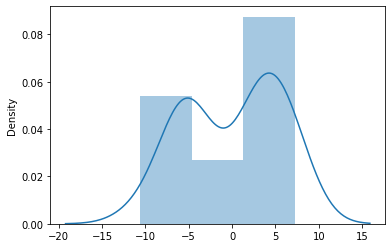

In [30]:
sns.distplot(resids)

In [13]:
#Durbin-Watson test for Autocorrelation


# - It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.
# - If the value ranges from 2-4, it is known as Negative autocorrelation.
# - If the value is exactly 2, it means No Autocorrelation.
# - For a good linear model, it should have low or no autocorrelation.

# As can be seen from the OLS Summary the value of the Durbin-Watson test statistic is 1.460.  (SLIGHT POSITIVE AUTO-CORRELATION) Very close to acceptable range
# Since this is not a time series dataset we cannot use lags to resolve this issue. 

In [14]:
import statsmodels
statsmodels.stats.stattools.durbin_watson(lin_reg.resid, axis=0)

1.4601573762506714

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted')]

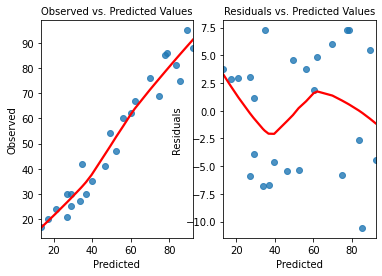

In [29]:
    fitted_vals = lin_reg.predict()
    resids = lin_reg.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=10)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=10)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

In [15]:
#Multicollinearity need not be tested as there is only one feature.

In [16]:
#Goldfeld-Quandt Test for Heteroscedasticity

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(lin_reg.resid, lin_reg.model.exog)
lzip(name, test)

[('F statistic', 0.7744748447886173), ('p-value', 0.652695169229254)]

Null hypothesis is Homoscedasticity. Since pvalue is greater than 0.05, we may accept null hypothesis of homoscedasticity.

#Building the Linear Regression Model

Since all the assumptions are satisfied we can move forward to Model Building.

In [17]:
X=df['Hours']
y=df['Scores']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)



(20,)
(5,)


In [18]:
#Initializing the model and fitting on train data
lin_reg1 = LinearRegression()
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

model = lin_reg1.fit(X_train,y_train)

#Evaluating the model through metrics

In [19]:
#Checking the Rsquare value
print(f'R^2 score for train: {lin_reg1.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg1.score(X_test, y_test)}')

R^2 score for train: 0.9515510725211553
R^2 score for test: 0.9454906892105354


The R^2 value of both train and test are comparable. Hence the model is generalized.

In [20]:
y_pred=lin_reg1.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [31]:
y_pred = list(np.ravel(np.round(y_pred)))
y_test = list(np.ravel(y_test))

In [32]:
pred = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
pred

,Actual,Predicted
0,20,17.0
1,27,34.0
2,69,75.0
3,30,27.0
4,62,60.0


In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
print(f'Root Mean Squared of test: {np.sqrt(mean_squared_error(y_test,y_pred))}')

Root Mean Squared of test: 4.626013402488151


Since, its a simple linear regression model and only one model has been created, we cannot compare the RMSE value.


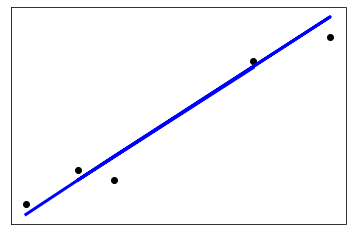

In [25]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test,y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [26]:
print(f'The final model is \n Score = {lin_reg1.intercept_} + {lin_reg1.coef_}*Hours')

The final model is 
 Score = [2.01816004] + [[9.91065648]]*Hours


#Testing the Model on a new input

In [27]:
test_input = [9.25]
y_pred1= lin_reg1.predict(np.array(test_input).reshape(-1,1))
y_pred_final= np.ravel(y_pred1)
print(f'If you study for {test_input} hours, then you can score {y_pred_final}.')

If you study for [9.25] hours, then you can score [93.69173249].


CAVEAT: One should understand with this linear model, if the number of hours is kept on increasing, the marks will go beyond maximum marks. Hence we have to be careful and put realistic hours.